In [61]:
import pandas as pd 
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
names=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris = pd.read_csv('/content/drive/MyDrive/Data_Science/Classification/iris.data',names=names)
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Objective of this project is to train a model that can accurately identify one of the three given flower types (Iris-Setosa, Iris-Virginica, Iris-versicolor) from their characteristics. The models trained will be Logistic Regression, Naive Bayes, KNeighbors, SVM, and RandomForest. 

In [35]:
#Let's check for any zeros, NaNs, outliers, and erroneous instances in our data. 
(iris == 0).sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64

In [36]:
(iris == 99999).sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64

0

In [41]:
print('Assuming a normal distributions')
print((iris.values[:,:4] > iris.values[:,:4].mean()+3*iris.values[:,:4].std()).sum(), 'Outliers greater than 3std from the mean')
print((iris.values[:,:4] < iris.values[:,:4].mean()-3*iris.values[:,:4].std()).sum(), 'Outliers less than 3std from the mean')

Assuming a normal distributions
0 Outliers greater than 3std from the mean
0 Outliers less than 3std from the mean


In [118]:
print('Assuming a normal distributions')
print((iris > iris.mean()+3*iris.std()).sum(), 'Outliers greater than 3std from the mean')
print((iris < iris.mean()-3*iris.std()).sum(), 'Outliers less than 3std from the mean')

Assuming a normal distributions
Class           0
Petal_Length    0
Petal_Width     0
Sepal_Length    0
Sepal_Width     1
dtype: int64 Outliers greater than 3std from the mean
Class           0
Petal_Length    0
Petal_Width     0
Sepal_Length    0
Sepal_Width     0
dtype: int64 Outliers less than 3std from the mean


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarn

In [26]:
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.0,150.0,150.0,150.0
unique,35.0,23.0,43.0,22.0
top,5.0,3.0,1.5,0.2
freq,10.0,26.0,14.0,28.0


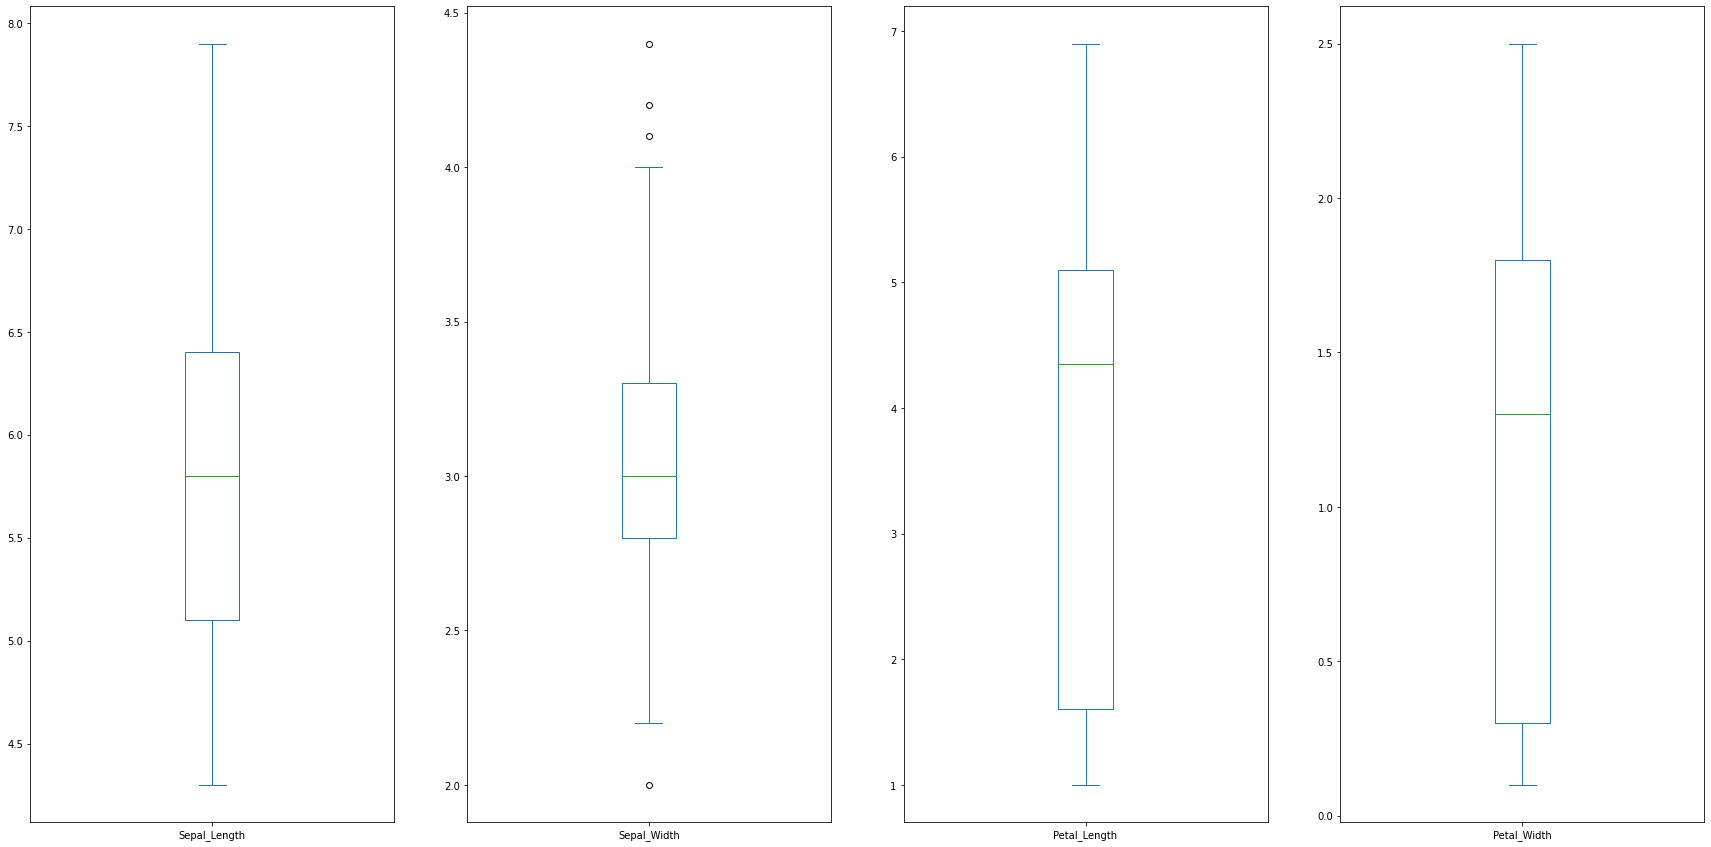

In [18]:
iris.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(30,15))
plt.show()
#Plotted to show possible outliers in the data. 
#Not too many, I'll leave them primarily because I forgot how to remove them 

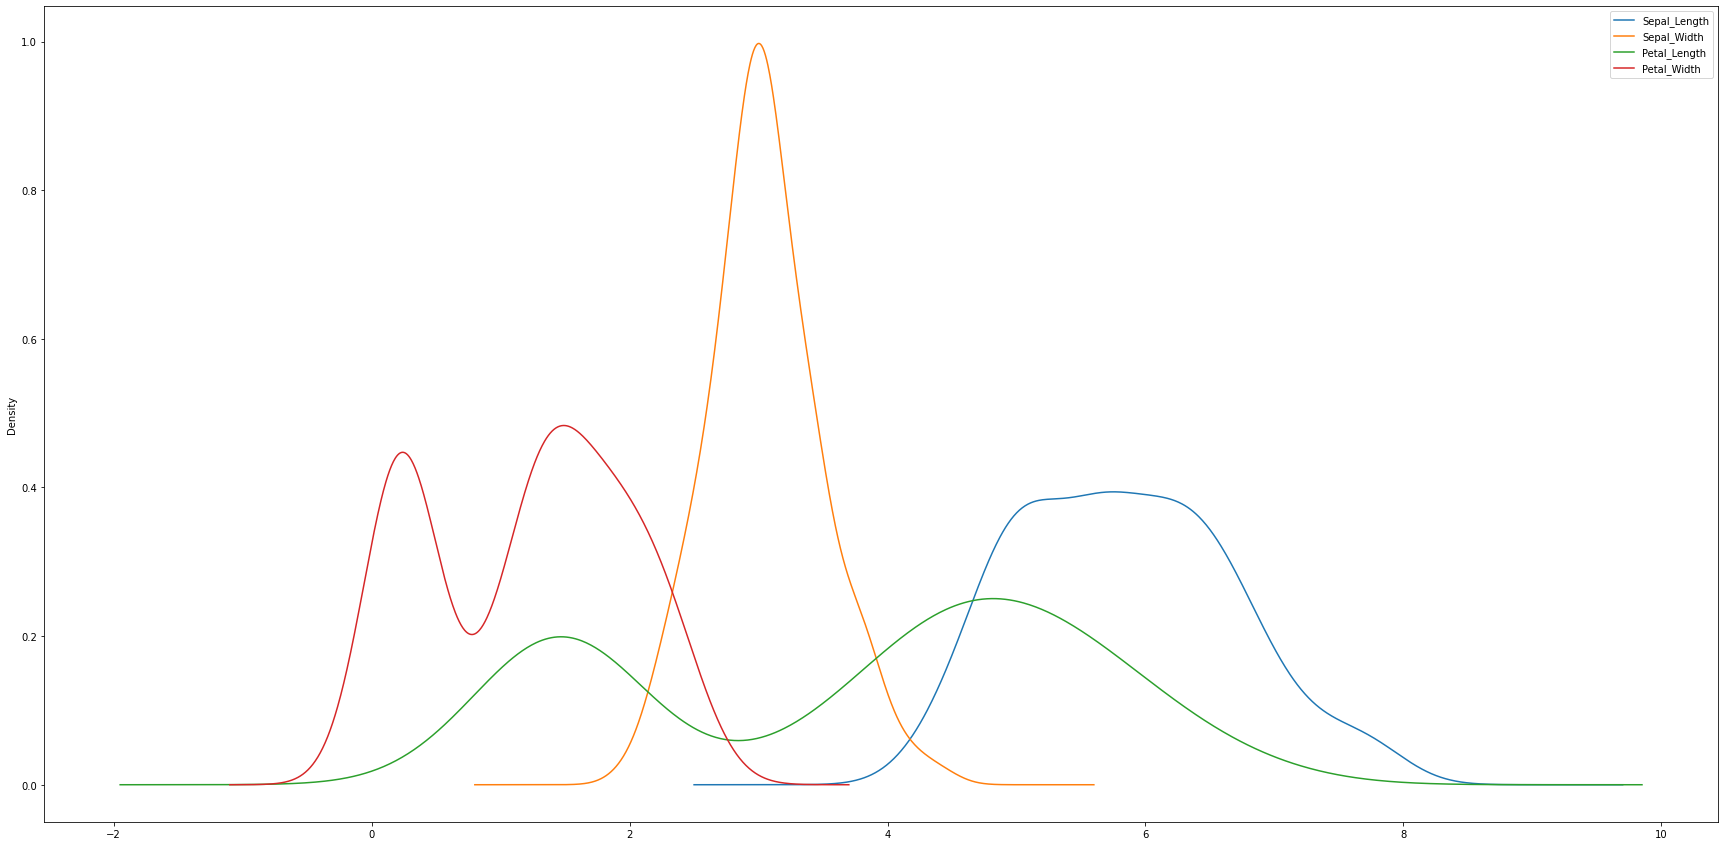

In [19]:
iris.plot(kind='kde', figsize=(30,15), )
plt.show()
#Plotted to the distributions of the different variables 
#None except Sepal_width seem to be normally distributed 
#I'll run a model initially to see if we can get decent predictions 
#if not then I'll make the distributions normal w/ a yeo-j transformation

In [38]:
#Let's next check correlations betweewn all of the variables 
iris.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.871754,-0.420516,1.000000,0.962757
Petal_Width,0.817954,-0.356544,0.962757,1.000000


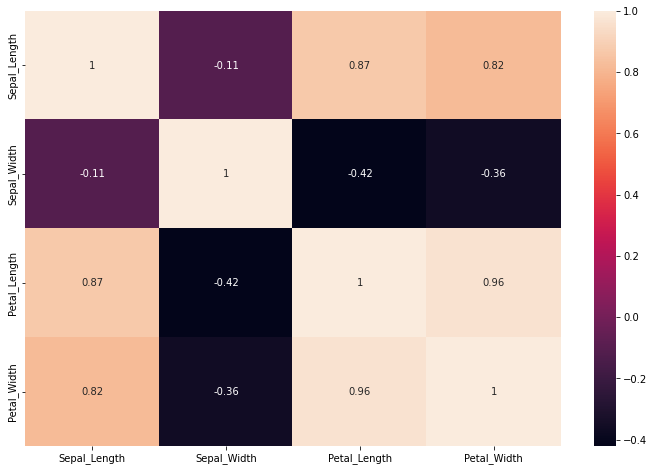

              Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Sepal_Length      1.000000    -0.109369      0.871754     0.817954
Sepal_Width      -0.109369     1.000000     -0.420516    -0.356544
Petal_Length      0.871754    -0.420516      1.000000     0.962757
Petal_Width       0.817954    -0.356544      0.962757     1.000000


In [39]:
#Visualization of correlations
plt.figure(figsize=(12,8))
cor = iris.corr()
sns.heatmap(cor, annot=True)
plt.show()
print(cor)

Going to run a few different machine learning models (Logistic Regression, Naive Bayes, KNeighbors, SVM, and RandomForest) 

In [46]:
#Classifiers 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [54]:
array = iris.values
x_values = array[:,:4]
y_values = array[:,4:].ravel()
y_values.shape

(150,)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, shuffle=True)
print(x_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [109]:
import multiprocessing
from multiprocessing import get_context
import time

models = []
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LogR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('KN',KNeighborsClassifier(n_neighbors=3)))

results = []
names = []

def model_machine(models):
  for name, model in models: 
    model.fit(x_train,y_train)
    kfold = StratifiedKFold(n_splits=6, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_test, y_test, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(name,'--> Avg Accuracy:', cv_results.mean(),'| Std:', cv_results.std())
    print(classification_report(y_test, model.predict(x_test)))

#Parallelization of the model_machine function
#Each model is trained and evaluated on separate cores simulateously 

pool = multiprocessing.get_context("fork").Pool(5)
start_time=time.time()
pool.map(model_machine, (models,))
pool.close()

RF --> Avg Accuracy: 0.9333333333333332 | Std: 0.09428090415820632
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.96      0.94        30
   weighted avg       0.95      0.93      0.93        30

SVM --> Avg Accuracy: 0.9333333333333332 | Std: 0.09428090415820632
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.96      0.94        30
   weighted avg       0.95      0.93      0.93        30

LogR --> Avg Accuracy: 0.9333333333333332 | Std: 0.0942809041

- Notice that we have a three way tie for first with Random Forest Classifier, Support Vector Machines, and Logistic Regression sharing the first place pedestal. 

- Further work will include advantages and disadvantages of each model selected as well as parameter exploration. 

- Additionally, feature engineering for variable normalization as well as variable removal in order to improve accuracies will aslo be considered. 